# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [4]:
cities

['faanui',
 'dera ismail khan',
 'lahaina',
 'mazagao',
 'korla',
 'bredasdorp',
 'hambantota',
 'saskylakh',
 'fortuna',
 'airai',
 'saint anthony',
 'vidim',
 'vardo',
 'mataura',
 'saint-georges',
 'kapaa',
 'ushuaia',
 'ponta do sol',
 'rikitea',
 'atuona',
 'manta',
 'iwanai',
 'olafsvik',
 'mahebourg',
 'huarmey',
 'lagoa',
 'northam',
 'nikolskoye',
 'japura',
 'iqaluit',
 'novosokolniki',
 'santa cruz',
 'mabalodbalod',
 'butaritari',
 'punta arenas',
 'srednekolymsk',
 'te anau',
 'port alfred',
 'dikson',
 'caravelas',
 'touros',
 'guerrero negro',
 'farah',
 'hami',
 'illoqqortoormiut',
 'ystad',
 'hasaki',
 'mar del plata',
 'busselton',
 'tuatapere',
 'eenhana',
 'albany',
 'tasiilaq',
 'puerto ayora',
 'mayumba',
 'georgetown',
 'komsomolskiy',
 'saurimo',
 'bargal',
 'racale',
 'saint-francois',
 'aviles',
 'phalodi',
 'pevek',
 'buala',
 'boyolangu',
 'jamestown',
 'vaitupu',
 'barrow',
 'klaksvik',
 'batticaloa',
 'maceio',
 'methoni',
 'taolanaro',
 'tabou',
 'yar-sal

In [5]:
city_weather=pd.DataFrame({"City_List":cities})
city_weather

,City_List
0,faanui
1,dera ismail khan
2,lahaina
3,mazagao
4,korla
...,...
599,arivonimamo
600,ukiah
601,labuhan
602,havre-saint-pierre


### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
for_counter=0
Name=[]
Pressure=[]
Humidity=[]
Latitude=[]
MaxTemperature=[]
Cloudiness=[]
Wind_Speed=[]

for index,city in enumerate(cities):
    base_url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key
    full_request = base_url + '&q='+cities[for_counter]
    req = requests.get(full_request)
    print("Current Processing City:",cities[for_counter])
    #print(req.text)
    weather_data=req.json()
    weather_data
    if weather_data["cod"]!="404":
        Name.append(weather_data['name'])
        Humidity.append(weather_data['main']['humidity'])
        Pressure.append(weather_data['main']['pressure'])
        Latitude.append(weather_data['coord']['lat'])
        MaxTemperature.append(weather_data['main']['temp_max'])
        Cloudiness.append(weather_data['clouds']['all'])
        Wind_Speed.append(weather_data['wind']['speed'])
        print("City Number:",index)
    else:
        print("City not found")
    for_counter+=1


Current Processing City: faanui
City Number: 0
Current Processing City: dera ismail khan
City Number: 1
Current Processing City: lahaina
City Number: 2
Current Processing City: mazagao
City Number: 3
Current Processing City: korla
City Number: 4
Current Processing City: bredasdorp
City Number: 5
Current Processing City: hambantota
City Number: 6
Current Processing City: saskylakh
City Number: 7
Current Processing City: fortuna
City Number: 8
Current Processing City: airai
City Number: 9
Current Processing City: saint anthony
City Number: 10
Current Processing City: vidim
City Number: 11
Current Processing City: vardo
City Number: 12
Current Processing City: mataura
City Number: 13
Current Processing City: saint-georges
City Number: 14
Current Processing City: kapaa
City Number: 15
Current Processing City: ushuaia
City Number: 16
Current Processing City: ponta do sol
City Number: 17
Current Processing City: rikitea
City Number: 18
Current Processing City: atuona
City Number: 19
Current 

Current Processing City: gigmoto
City Number: 162
Current Processing City: sfantu gheorghe
City Number: 163
Current Processing City: constitucion
City Number: 164
Current Processing City: hilo
City Number: 165
Current Processing City: tezze sul brenta
City Number: 166
Current Processing City: sale
City Number: 167
Current Processing City: aden
City Number: 168
Current Processing City: upernavik
City Number: 169
Current Processing City: mys shmidta
City not found
Current Processing City: thompson
City Number: 171
Current Processing City: arraial do cabo
City Number: 172
Current Processing City: khatanga
City Number: 173
Current Processing City: zhigansk
City Number: 174
Current Processing City: kruisfontein
City Number: 175
Current Processing City: victoria
City Number: 176
Current Processing City: harper
City Number: 177
Current Processing City: barentsburg
City not found
Current Processing City: weihai
City Number: 179
Current Processing City: quetzaltepec
City not found
Current Proce

Current Processing City: sitka
City Number: 322
Current Processing City: bakel
City Number: 323
Current Processing City: zhengjiatun
City Number: 324
Current Processing City: langsa
City Number: 325
Current Processing City: makakilo city
City Number: 326
Current Processing City: choma
City Number: 327
Current Processing City: amderma
City not found
Current Processing City: satun
City Number: 329
Current Processing City: maningrida
City Number: 330
Current Processing City: sur
City Number: 331
Current Processing City: brokopondo
City Number: 332
Current Processing City: acapulco
City Number: 333
Current Processing City: yuncheng
City Number: 334
Current Processing City: lorengau
City Number: 335
Current Processing City: calabozo
City Number: 336
Current Processing City: nehe
City Number: 337
Current Processing City: show low
City Number: 338
Current Processing City: bereda
City Number: 339
Current Processing City: chumikan
City Number: 340
Current Processing City: antalaha
City Number: 

Current Processing City: hlotse
City Number: 485
Current Processing City: balkanabat
City Number: 486
Current Processing City: bang mun nak
City Number: 487
Current Processing City: santa marta
City Number: 488
Current Processing City: jodiya
City Number: 489
Current Processing City: sile
City Number: 490
Current Processing City: gunjur
City Number: 491
Current Processing City: palmer
City Number: 492
Current Processing City: palora
City Number: 493
Current Processing City: pop
City Number: 494
Current Processing City: tumannyy
City not found
Current Processing City: providencia
City Number: 496
Current Processing City: andenes
City Number: 497
Current Processing City: umbauba
City Number: 498
Current Processing City: tacoronte
City Number: 499
Current Processing City: carlisle
City Number: 500
Current Processing City: wagar
City Number: 501
Current Processing City: uyuni
City Number: 502
Current Processing City: juneau
City Number: 503
Current Processing City: nuuk
City Number: 504
Cu

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dic={"Name":Name,"Humidity":Humidity,"Wind_Speed":Wind_Speed,"Cloudiness":Cloudiness,"Pressure":Pressure,"Latitude":Latitude,"MaxTemperature":MaxTemperature}
weather_dic_df=pd.DataFrame(weather_dic)
weather_dic_df
weather_dic_df1=weather_dic_df[["Name","Latitude","Humidity","MaxTemperature","Wind_Speed","Pressure","Cloudiness"]]
weather_dic_df1

,Name,Latitude,Humidity,MaxTemperature,Wind_Speed,Pressure,Cloudiness
0,Faanui,-16.4833,71,80.91,14.74,1012,75
1,Dera Ismail Khan,31.8327,30,73.31,4.94,1012,0
2,Lahaina,20.8783,77,75.20,11.50,1019,20
3,Mazagão,-0.1150,94,77.00,6.91,1008,90
4,Korla,41.7597,28,58.69,4.54,1018,100
...,...,...,...,...,...,...,...
550,Arivonimamo,-19.0167,88,64.40,9.22,1024,75
551,Ukiah,39.1502,51,59.00,5.75,1022,1
552,Labuhan,-6.8844,87,78.71,10.02,1007,96
553,Havre-St-Pierre,50.2334,66,53.60,19.57,1020,90


In [8]:
weather_dic_df.to_csv('/Users/shreekar/Desktop/Week5/Citi_data.csv ')
print("csv file created at location Desktop - Week5 Folder")

csv file created at location Desktop - Week5 Folder


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

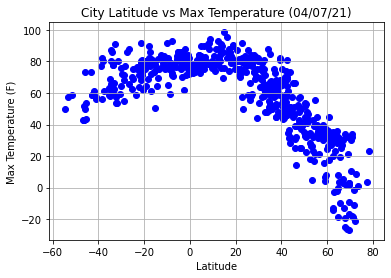

In [9]:
fig, ax = plt.subplots()
ax.scatter(weather_dic_df["Latitude"],weather_dic_df["MaxTemperature"],marker="o",color="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.show()
fig.savefig('/Users/shreekar/Desktop/Week5/LatVsMaxtemp.png')

#### Latitude vs. Humidity Plot

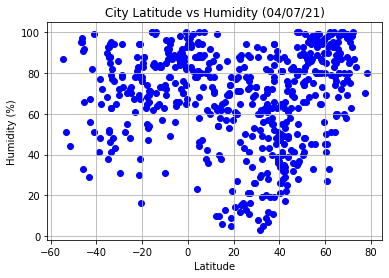

In [10]:
fig, ax = plt.subplots()
ax.scatter(weather_dic_df["Latitude"],weather_dic_df["Humidity"],marker="o",color="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs Humidity (%s)" %time.strftime("%x"))
plt.grid()
plt.show()
fig.savefig('/Users/shreekar/Desktop/Week5/LatVsHumidity.png')

#### Latitude vs. Cloudiness Plot

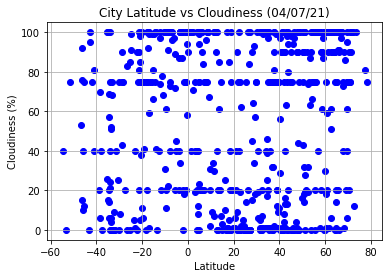

In [11]:
fig, ax = plt.subplots()
ax.scatter(weather_dic_df["Latitude"],weather_dic_df["Cloudiness"],marker="o",color="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.show()
fig.savefig('/Users/shreekar/Desktop/Week5/LatVsCloudiness.png')

#### Latitude vs. Wind Speed Plot

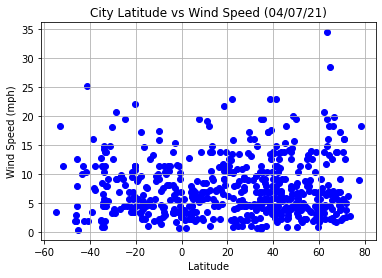

In [12]:
fig, ax = plt.subplots()
ax.scatter(weather_dic_df["Latitude"],weather_dic_df["Wind_Speed"],marker="o",color="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.show()
fig.savefig('/Users/shreekar/Desktop/Week5/LatVsWindspeed.png')

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

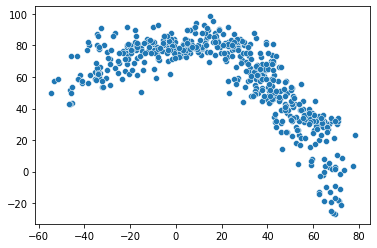

In [13]:
import seaborn as sns
sns.scatterplot(x= Latitude,y=MaxTemperature)
plt.show()

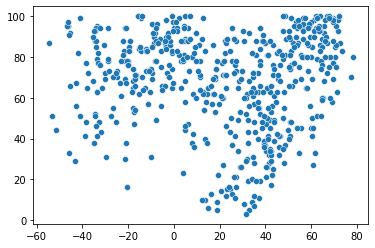

In [14]:
import seaborn as sns
sns.scatterplot(x= Latitude,y=Humidity)
plt.show()

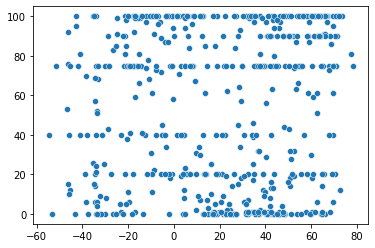

In [15]:
import seaborn as sns
sns.scatterplot(x= Latitude,y=Cloudiness)
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

1.As we approach the equater we can prove that the tempertures get warmer with reference to the 
plot (Latitude vs Max temperatures) which is clearly visible at the equater. Currently the north hemisphere is warmer
temperatures when compared to southern hemisphere.
2.Latitude vs Humdity graph has a scattred data which means data is wide spread and cannot conclude the relation 
between them.
3.Latitude vs Cloudiness graph with observation looks like cloudiness is similar for the places which are along the 
parallels (lines of latitude).
4.Latitude vs Windspeed graph almost 85% to 90% of the places we considered for obeservation have speed less than 20mph.

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

In [88]:
base_url="https://api.openweathermap.org/data/2.5/forecast?q=chicago&appid="+api_key
full_request = base_url
req = requests.get(full_request)
print(req.text)
weather_data1=req.json()
weather_data1

{"cod":"200","message":0,"cnt":40,"list":[{"dt":1617829200,"main":{"temp":297.99,"feels_like":297.73,"temp_min":295.54,"temp_max":297.99,"pressure":1007,"sea_level":1007,"grnd_level":985,"humidity":46,"temp_kf":2.45},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"clouds":{"all":83},"wind":{"speed":6.02,"deg":174},"visibility":10000,"pop":0.09,"sys":{"pod":"d"},"dt_txt":"2021-04-07 21:00:00"},{"dt":1617840000,"main":{"temp":295.32,"feels_like":295.05,"temp_min":293.94,"temp_max":295.32,"pressure":1005,"sea_level":1005,"grnd_level":984,"humidity":56,"temp_kf":1.38},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"clouds":{"all":90},"wind":{"speed":5.97,"deg":163},"visibility":10000,"pop":0.28,"rain":{"3h":0.15},"sys":{"pod":"d"},"dt_txt":"2021-04-08 00:00:00"},{"dt":1617850800,"main":{"temp":291.92,"feels_like":291.71,"temp_min":291.35,"temp_max":291.92,"pressure":1005,"sea_level":1005,"grnd_level":984,"humidity":71,"temp_k

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1617829200,
   'main': {'temp': 297.99,
    'feels_like': 297.73,
    'temp_min': 295.54,
    'temp_max': 297.99,
    'pressure': 1007,
    'sea_level': 1007,
    'grnd_level': 985,
    'humidity': 46,
    'temp_kf': 2.45},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 83},
   'wind': {'speed': 6.02, 'deg': 174},
   'visibility': 10000,
   'pop': 0.09,
   'sys': {'pod': 'd'},
   'dt_txt': '2021-04-07 21:00:00'},
  {'dt': 1617840000,
   'main': {'temp': 295.32,
    'feels_like': 295.05,
    'temp_min': 293.94,
    'temp_max': 295.32,
    'pressure': 1005,
    'sea_level': 1005,
    'grnd_level': 984,
    'humidity': 56,
    'temp_kf': 1.38},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 90},
   'wind': {'speed': 5.97, 'deg': 163},
   'visibility': 10000,
   'pop': 0.28

In [29]:
weather_data1["list"][0]["main"]["humidity"]


46

In [92]:
weather_data1["city"]["coord"]["lat"]

41.85

In [30]:
weather_data1["list"][0]["clouds"]["all"]


83

In [31]:
weather_data1["list"][0]["dt_txt"]

'2021-04-07 21:00:00'

In [42]:
humidity=[]
pressure=[]
cloudiness=[]
counter=0
for i in range(40):
    humidity.append(weather_data1["list"][counter]["main"]["humidity"])
    pressure.append(weather_data1["list"][counter]["main"]["pressure"])
    cloudiness.append(weather_data1["list"][counter]["clouds"]["all"]
)
    counter+=1
print("Humidity",humidity)
print("Pressure",pressure)
print("Cloudiness",cloudiness)

Humidity [46, 56, 71, 85, 87, 90, 88, 75, 71, 64, 73, 84, 82, 83, 79, 67, 56, 60, 63, 75, 84, 85, 71, 71, 77, 92, 94, 96, 89, 86, 78, 57, 56, 57, 66, 71, 76, 78, 58, 47]
Pressure [1007, 1006, 1005, 1004, 1002, 1002, 1002, 1000, 999, 1002, 1002, 1001, 1001, 1001, 1003, 1003, 1003, 1004, 1004, 1005, 1005, 1004, 1002, 999, 996, 996, 995, 993, 994, 996, 999, 999, 1001, 1003, 1005, 1007, 1008, 1009, 1010, 1010]
Cloudiness [83, 90, 42, 59, 100, 100, 100, 99, 100, 93, 96, 98, 100, 100, 100, 100, 96, 76, 79, 78, 94, 91, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 76, 60, 14, 7, 0, 16]


In [87]:
hour_list={"Humidity":humidity,"Pressure":pressure,"Cloudiness":cloudiness}
hourly_df=pd.DataFrame(hour_list)
hourly_df

,Humidity,Pressure,Cloudiness
0,46,1007,83
1,56,1006,90
2,71,1005,42
3,85,1004,59
4,87,1002,100
5,90,1002,100
6,88,1002,100
7,75,1000,99
8,71,999,100
9,64,1002,93
